Import relevant packages here.

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [75]:
data = pd.read_csv('cf_data.csv')
data.index = data.index + 1 #file starts at 1 because of columnnames
display(data.head(5))
display(data.tail(5))




,dv,s,a
1,-0.743240,53.5427,1.242570
2,-0.557230,53.6120,1.777920
3,-0.454769,53.6541,0.544107
4,-0.525396,53.7030,-0.294755
5,-0.601285,53.7592,-0.290961


,dv,s,a
73904,5.19874,116.139,-0.795081
73905,5.10428,115.627,-0.314263
73906,5.13764,115.118,0.232283
73907,5.15348,114.599,0.262078
73908,5.25868,113.112,-0.612440


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [76]:

dv = np.linspace(-10, 10, 41)
s = np.linspace(0, 200, 21)
a = np.zeros((len(s), len(dv)))

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [77]:
dv_data = data.dv.to_numpy()
s_data = data.s.to_numpy()            
a_data = data.a.to_numpy() 

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [78]:

upsilon = 1.5  # m/s
sigma = 30     # m

for i in range(len(dv)):  # Loping speed difference (X-as)
    print(f"Iteration {i+1} van {len(dv)}")
    for j in range(len(s)):  # Loping headway (Y-as)
        dv_grid = dv[i]
        s_grid = s[j]
        
        # Calculate weights absolute
        weights = np.exp(-np.abs((dv_grid - dv_data) / upsilon) - np.abs((s_grid - s_data) / sigma))
        weighted_sum = np.sum(weights * a_data)
        weight_total = np.sum(weights)
        
        # Not dividing by zero
        if weight_total > 0:
            a[j, i] = weighted_sum / weight_total  
        else:
            a[j, i] = 0


Iteration 1 van 41
Iteration 2 van 41
Iteration 3 van 41
Iteration 4 van 41
Iteration 5 van 41
Iteration 6 van 41
Iteration 7 van 41
Iteration 8 van 41
Iteration 9 van 41
Iteration 10 van 41
Iteration 11 van 41
Iteration 12 van 41
Iteration 13 van 41
Iteration 14 van 41
Iteration 15 van 41
Iteration 16 van 41
Iteration 17 van 41
Iteration 18 van 41
Iteration 19 van 41
Iteration 20 van 41
Iteration 21 van 41
Iteration 22 van 41
Iteration 23 van 41
Iteration 24 van 41
Iteration 25 van 41
Iteration 26 van 41
Iteration 27 van 41
Iteration 28 van 41
Iteration 29 van 41
Iteration 30 van 41
Iteration 31 van 41
Iteration 32 van 41
Iteration 33 van 41
Iteration 34 van 41
Iteration 35 van 41
Iteration 36 van 41
Iteration 37 van 41
Iteration 38 van 41
Iteration 39 van 41
Iteration 40 van 41
Iteration 41 van 41


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

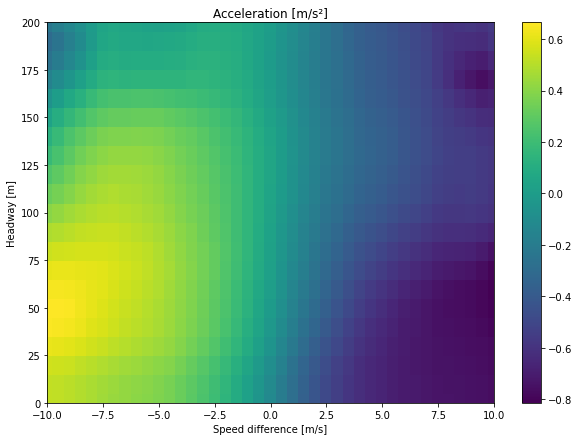

In [79]:

X, Y = np.meshgrid(dv, s)  
fig, ax = plt.subplots(figsize=(10, 7))
c = ax.pcolormesh(X, Y, a, shading='auto', cmap='viridis')
ax.set_title('Acceleration [m/s²]')
ax.set_xlabel('Speed difference [m/s]')
ax.set_ylabel('Headway [m]')
ax.set_xlim(dv.min(), dv.max())
ax.set_ylim(s.min(), s.max())   
fig.colorbar(c, ax=ax)
plt.show()

